# Revisando el Catálogo

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
catalog = scipy.io.readsav('cosmos2020_farmer_phot.sav')

In [3]:
print(catalog.keys())

dict_keys(['id', 'ra', 'dec', 'id2015', 'zphot', 'zlo', 'zhi', 'mag', 'emag', 'logm', 'logmlo', 'logmhi', 'ub0', 'dub0', 'uv0', 'duv0', 'vj0', 'dvj0'])


In [4]:
ra = catalog["ra"]
ra

array([150.47759181, 150.47797762, 150.47702381, ..., 150.07153936,
       150.08864562, 150.08666821])

In [5]:
dec = catalog["dec"]
dec

array([2.32892806, 2.32916986, 2.32948282, ..., 2.87415142, 2.87678241,
       2.87700635])

In [6]:
logm = catalog["logm"]
logm

array([8.52185, 5.27514,     nan, ..., 8.487  , 8.74967, 9.0175 ])

In [7]:
zphot = catalog["zphot"]
zphot

array([1.593 , 0.1151,    nan, ...,    nan,    nan,    nan])

In [8]:
#Para valores z>2

lista_de_arrays = [np.array(zphot)]
resultados = [array[array > 2] for array in lista_de_arrays]

print(resultados)

#Imprimir la lista completa
#print("Lista completa:")
#for array in resultados:
 #   for elemento in array:
  #      print(elemento, end=' ')

[array([2.8698, 2.8235, 4.775 , ..., 4.2732, 2.6115, 7.6066])]


In [9]:
#Zlow
zlo = catalog["zlo"]
zlo

array([1.514 , 0.0234,    nan, ..., 1.4051, 2.3782, 1.4486])

In [10]:
#Zhi
zhi = catalog["zhi"]
zhi

array([1.6732, 0.4184,    nan, ..., 1.9242, 2.9061, 3.9265])

# Graficos

In [11]:
ra2 = ra[(zphot > 2) & (zphot < 2.1)]
dec2 = dec[(zphot > 2) & (zphot < 2.1)]
z2 = zphot[(zphot > 2) & (zphot < 2.1)]
lower_z = catalog["zlo"][(zphot > 2) & (zphot < 2.1)]
higher_z = catalog["zhi"][(zphot > 2) & (zphot < 2.1)]

Text(0, 0.5, 'dec2')

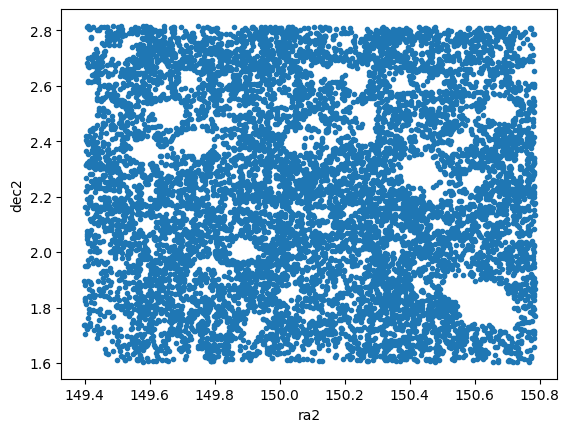

In [12]:
# Datos 
x = np.array(ra2)
y = np.array(dec2)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = ".")

plt.xlabel('ra2')
plt.ylabel('dec2')

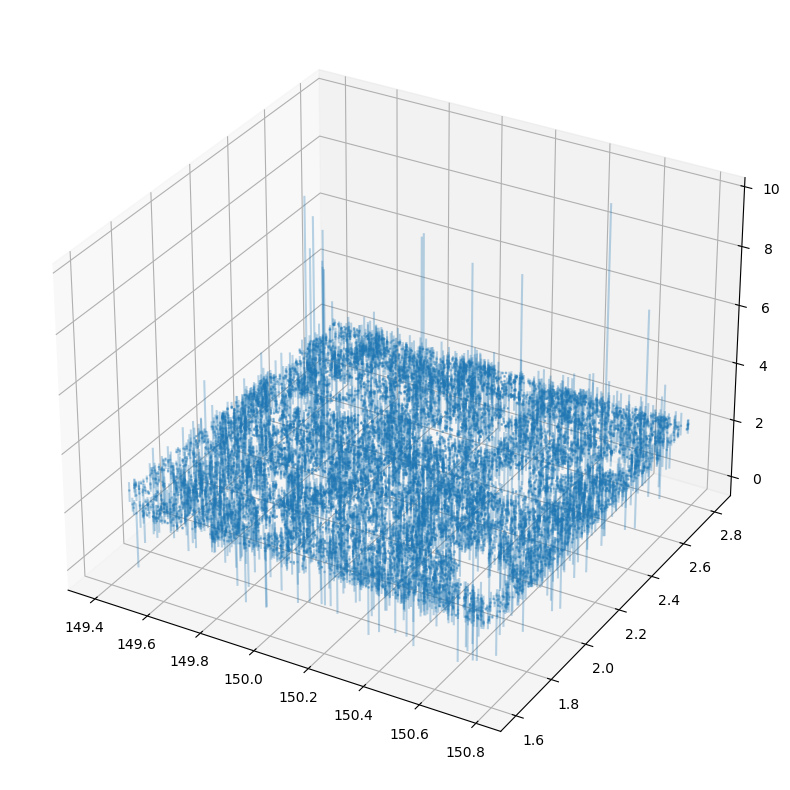

In [13]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.errorbar(ra2,dec2,z2, zerr = np.stack((z2 - lower_z, higher_z - z2)), fmt = "None", alpha = 0.3)
ax.scatter(ra2,dec2,z2, s = 1, alpha = 0.3)

### Histograma eje X

Text(0.5, 1.0, 'X-axis histogram')

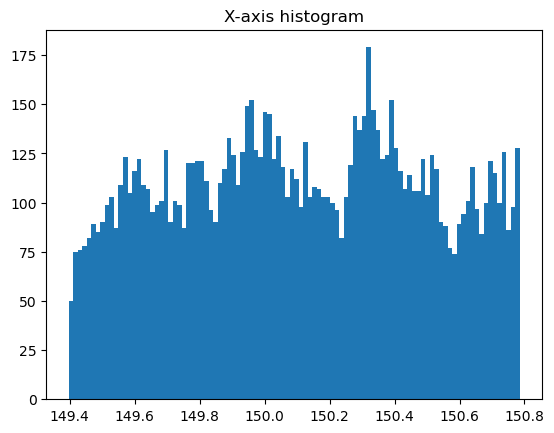

In [24]:
plt.hist(x, bins = 100);
plt.title("X-axis histogram")

### Histograma eje Y

Text(0.5, 1.0, 'Y-axis histogram')

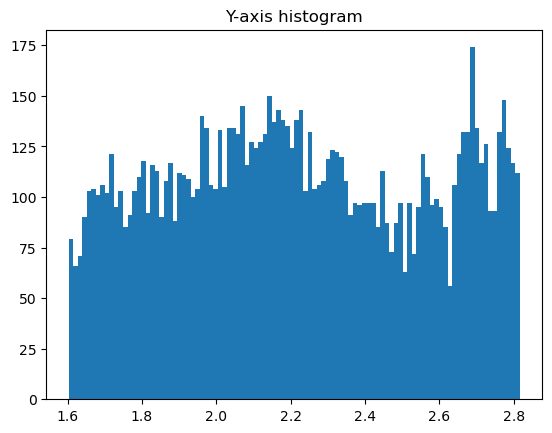

In [25]:
plt.hist(y, bins = 100);
plt.title("Y-axis histogram")

### Mapa de Densidad 
Juntando los graficos de histograma en el eje x e y, para que quede "grillado"

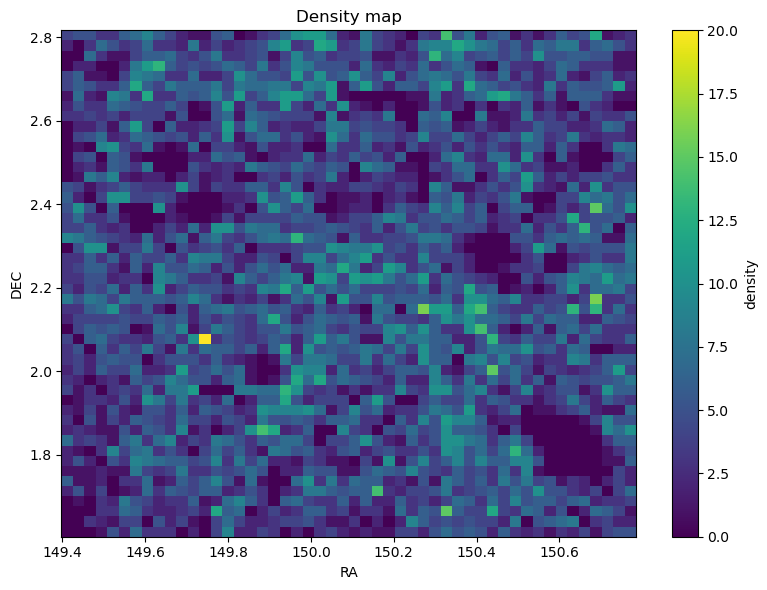

In [16]:
import matplotlib as mpl
from matplotlib import cm

fig = plt.figure(figsize = (8,6))
hist = np.histogram2d(x,y,bins = 50)
c = hist[0].flatten()
color = cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(c))
hist = plt.hist2d(x,y,bins = 50, cmap = color, norm = norm);
plt.colorbar(label = "density")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Density map")
fig.tight_layout()

# Distancia
Para cada pixel crear un bucle para calcular la distancia de las galaxias al centro del pixel (distancia de galaxia al pixel)

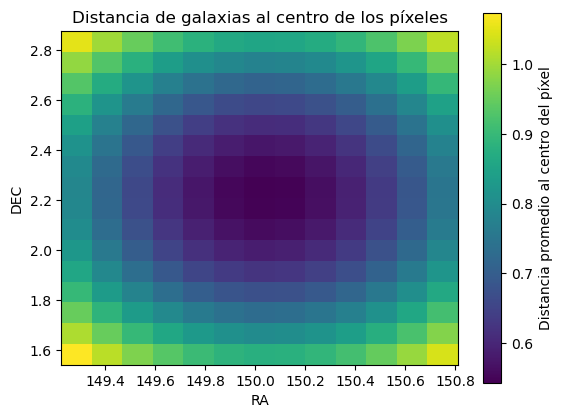

In [19]:
# Supongamos que tenemos las coordenadas de las galaxias en ra y dec
ra = catalog["ra"]
dec = catalog["dec"]

# Definimos los límites del grid y el tamaño del pixel
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.1 

# Creamos los grids de coordenadas de los centros de los píxeles
ra_centers = np.arange(ra_min + pixel_size/2, ra_max, pixel_size)
dec_centers = np.arange(dec_min + pixel_size/2, dec_max, pixel_size)

# Inicializamos una matriz para almacenar las distancias
distances = np.zeros((len(ra_centers), len(dec_centers)))

# Bucle sobre cada píxel
for i, ra_center in enumerate(ra_centers):
    for j, dec_center in enumerate(dec_centers):
        # Calculamos la distancia de cada galaxia al centro del pixel
        dists = np.sqrt((ra - ra_center)**2 + (dec - dec_center)**2)
        # Guardamos la distancia promedio o mínima en la matriz
        distances[i, j] = np.mean(dists) 

# Mostrar el mapa de distancias
plt.imshow(distances, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Distancia promedio al centro del píxel')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Distancia de galaxias al centro de los píxeles')
plt.show()

# Rango
Ordenando las distancias 

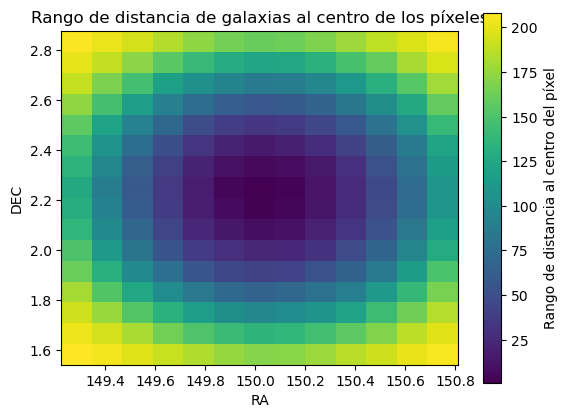

In [28]:
# Aplanamos la matriz de distancias para ordenarla
distances_flat = distances.flatten()

# Ordenamos las distancias y obtenemos los índices de orden
sorted_indices = np.argsort(distances_flat)

# Creamos una matriz para almacenar los rangos
ranks = np.zeros_like(distances_flat)

# Asignamos los rangos basados en los índices ordenados
ranks[sorted_indices] = np.arange(1, len(distances_flat) + 1)

# Reshapeamos la matriz de rangos a la forma original
ranks = ranks.reshape(distances.shape)

plt.imshow(ranks, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Rango de distancia al centro del píxel')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Rango de distancia de galaxias al centro de los píxeles')
plt.show()

# N-esimo vecino
tomamos el valor de la distancia, en donde n es el n-esimo vecino, en este caso tomamos n=5 y calculamos la sumatoria (densidad local para cada pixel)

El valor de la sumatoria es: 640.9165667967823


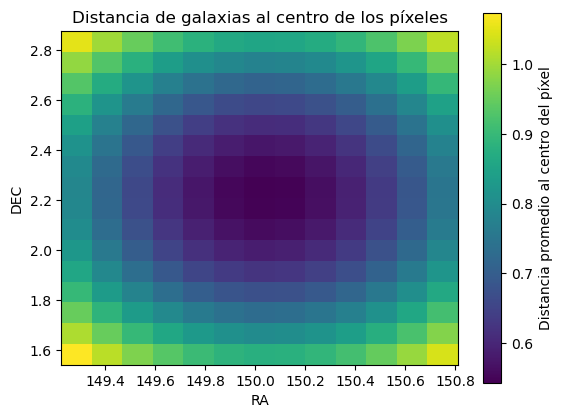

In [29]:
# Calculamos la sumatoria
n = 5
sumatoria = np.sum(n / (np.pi * distances_flat**2))

print("El valor de la sumatoria es:", sumatoria)

# Mostrar el mapa de distancias
plt.imshow(distances, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Distancia promedio al centro del píxel')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Distancia de galaxias al centro de los píxeles')
plt.show()

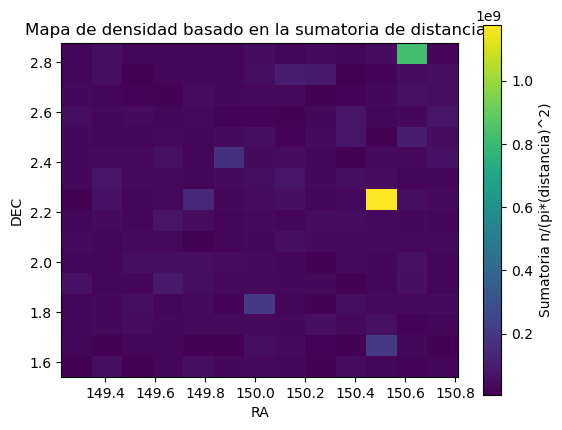

In [22]:
# Definimos los límites del grid y el tamaño del pixel
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.1  

# Creamos los grids de coordenadas de los centros de los píxeles
ra_centers = np.arange(ra_min + pixel_size/2, ra_max, pixel_size)
dec_centers = np.arange(dec_min + pixel_size/2, dec_max, pixel_size)

# Inicializamos una matriz para almacenar las sumatorias
sumatorias = np.zeros((len(ra_centers), len(dec_centers)))

# Valor de n
n = 5

# Bucle sobre cada píxel
for i, ra_center in enumerate(ra_centers):
    for j, dec_center in enumerate(dec_centers):
        # Calculamos la distancia de cada galaxia al centro del pixel
        dists = np.sqrt((ra - ra_center)**2 + (dec - dec_center)**2)
        sumatoria = np.sum(n / (np.pi * dists**2))
        sumatorias[i, j] = sumatoria

# Mostrar el mapa de densidad basado en la sumatoria
plt.imshow(sumatorias, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis')
plt.colorbar(label='Sumatoria n/(pi*(distancia)^2)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Mapa de densidad basado en la sumatoria de distancias')
plt.show()

### Otros intentos 
En este caso los resultados los intente ver de forma que me muestre un histograma

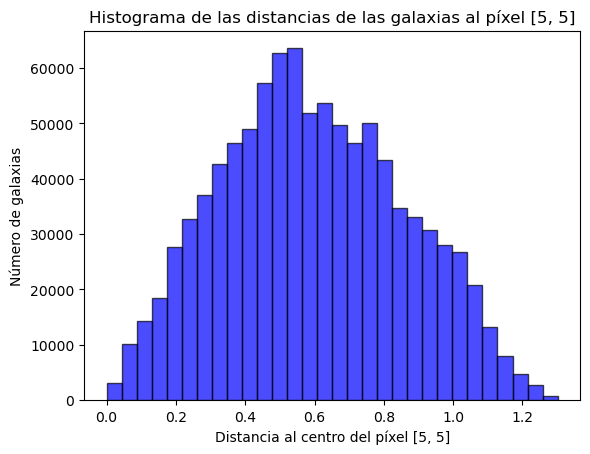

In [17]:
# Supongamos que tenemos las coordenadas de las galaxias en ra y dec
ra = catalog["ra"]
dec = catalog["dec"]

# Definimos los límites del grid y el tamaño del pixel
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.1  # tamaño del pixel 

# Creamos los grids de coordenadas de los centros de los píxeles
ra_centers = np.arange(ra_min + pixel_size/2, ra_max, pixel_size)
dec_centers = np.arange(dec_min + pixel_size/2, dec_max, pixel_size)

# Inicializamos una matriz para almacenar las distancias de cada galaxia a cada píxel
distances = np.zeros((len(ra_centers), len(dec_centers), len(ra)))

# Bucle sobre cada píxel
for i, ra_center in enumerate(ra_centers):
    for j, dec_center in enumerate(dec_centers):
        # Calculamos la distancia de cada galaxia al centro del pixel (v, u)
        dists = np.sqrt((ra - ra_center)**2 + (dec - dec_center)**2)
        distances[i, j, :] = dists

# Para mostrar las distancias al centro de un píxel específico (por ejemplo, el píxel en la posición [5, 5])
v, u = 5, 5
distancias_al_pixel = distances[v, u, :]

# Mostrar el histograma de las distancias de las galaxias al píxel [v, u]
plt.hist(distancias_al_pixel, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Distancia al centro del píxel [5, 5]')
plt.ylabel('Número de galaxias')
plt.title('Histograma de las distancias de las galaxias al píxel [5, 5]')
plt.show()

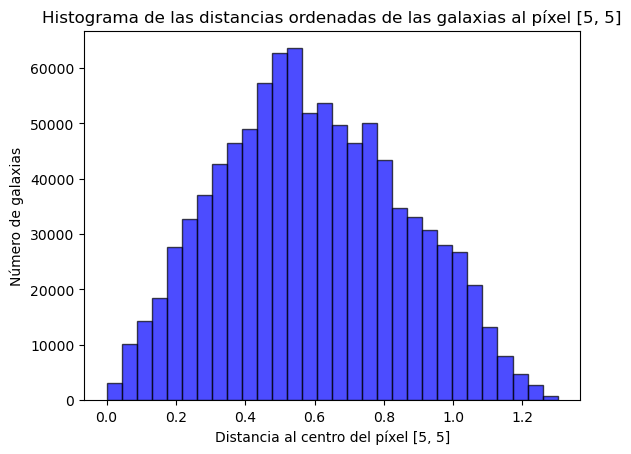

Las primeras 10 distancias ordenadas al píxel [5, 5]:
[0.00041102 0.00072374 0.00080213 0.00109671 0.00127321 0.00172034
 0.00237939 0.00249163 0.00272952 0.00283081]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tenemos las coordenadas de las galaxias en ra y dec
ra = catalog["ra"]
dec = catalog["dec"]

# Definimos los límites del grid y el tamaño del pixel
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.1  # tamaño del pixel en las mismas unidades que ra y dec

# Creamos los grids de coordenadas de los centros de los píxeles
ra_centers = np.arange(ra_min + pixel_size/2, ra_max, pixel_size)
dec_centers = np.arange(dec_min + pixel_size/2, dec_max, pixel_size)

# Inicializamos una matriz para almacenar las distancias de cada galaxia a cada píxel
distances = np.zeros((len(ra_centers), len(dec_centers), len(ra)))

# Bucle sobre cada píxel
for i, ra_center in enumerate(ra_centers):
    for j, dec_center in enumerate(dec_centers):
        # Calculamos la distancia de cada galaxia al centro del pixel (v, u)
        dists = np.sqrt((ra - ra_center)**2 + (dec - dec_center)**2)
        # Ordenamos las distancias
        distances[i, j, :] = np.sort(dists)

# Para mostrar las distancias ordenadas al centro de un píxel específico (por ejemplo, el píxel en la posición [5, 5])
v, u = 5, 5
distancias_ordenadas_al_pixel = distances[v, u, :]

# Mostrar el histograma de las distancias ordenadas de las galaxias al píxel [v, u]
plt.hist(distancias_ordenadas_al_pixel, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Distancia al centro del píxel [5, 5]')
plt.ylabel('Número de galaxias')
plt.title('Histograma de las distancias ordenadas de las galaxias al píxel [5, 5]')
plt.show()

# Opcional: Imprimir las primeras 10 distancias ordenadas al píxel [5, 5]
print("Las primeras 10 distancias ordenadas al píxel [5, 5]:")
print(distancias_ordenadas_al_pixel[:10])